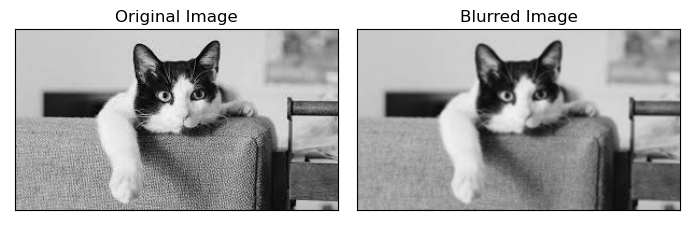

In [16]:
#blurred image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply Gaussian blur manually
def gaussian_blur(image, kernel_size):
    # Define the Gaussian kernel
    kernel = np.outer(cv2.getGaussianKernel(kernel_size, 0), cv2.getGaussianKernel(kernel_size, 0))

    # Pad the image
    padded_image = np.pad(image, ((kernel_size//2, kernel_size//2), (kernel_size//2, kernel_size//2)), 'edge')

    # Initialize the output image
    output_image = np.zeros_like(image)

    # Apply the Gaussian kernel
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output_image[i, j] = np.sum(padded_image[i:i+kernel_size, j:j+kernel_size] * kernel)

    return output_image

# Load the image
image_path = 'cat.jpg'
image = cv2.imread(image_path, 0)

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Gaussian blur manually
blurred = gaussian_blur(image, 3)

# Convert blurred image to RGB
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb, cmap='gray')
axs[0].set_title('Original Image')

# Plot the blurred image
axs[1].imshow(blurred_rgb, cmap='gray')
axs[1].set_title('Blurred Image')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


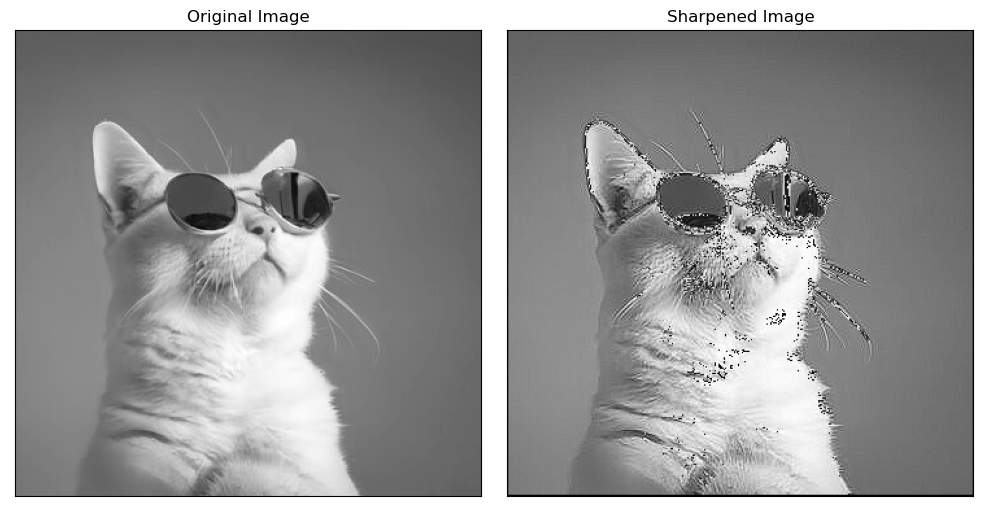

In [28]:
#sharpening image
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = 'cat1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define a sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Get image dimensions
height, width = image.shape

# Initialize output image
sharpened_image = np.zeros_like(image)

# Apply sharpening using manual convolution
for i in range(1, height-1):
    for j in range(1, width-1):
        sharpened_image[i, j] = np.sum(image[i-1:i+2, j-1:j+2] * kernel)

# Clip values to ensure they are within 0-255 range
sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

# Plot the original and sharpened images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')

# Plot the sharpened image
axs[1].imshow(sharpened_image, cmap='gray')
axs[1].set_title('Sharpened Image')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


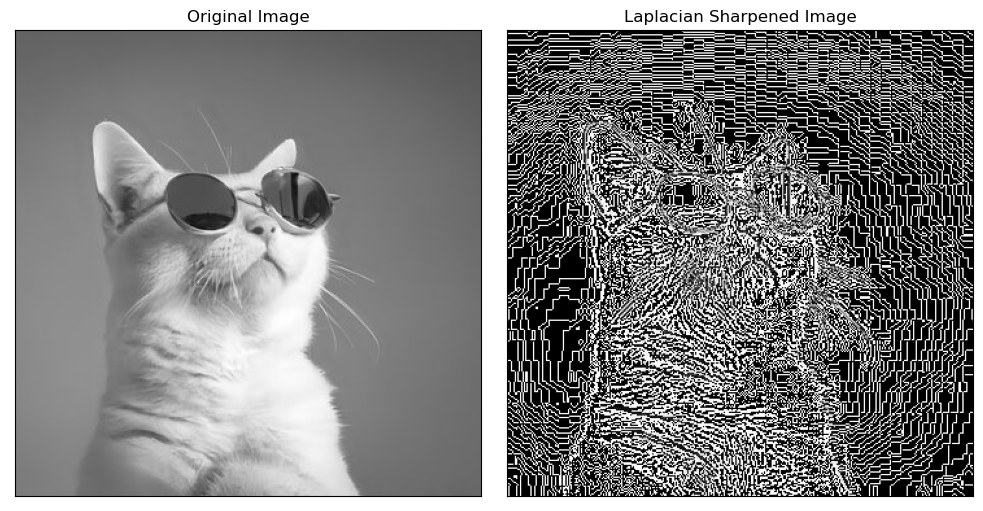

In [10]:
#laplacian sharpening
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = 'cat1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale for Laplacian

# Convert BGR image to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the Laplacian kernel
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

# Pad the image
padded_image = np.pad(image, ((1, 1), (1, 1)), 'edge')

# Initialize the output image
sharpened_image = np.zeros_like(image)

# Apply the Laplacian kernel
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        sharpened_image[i, j] = np.sum(padded_image[i:i+3, j:j+3] * laplacian_kernel)

# Clip values to ensure they are within 0-255 range
sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

# Convert sharpened image to RGB
sharpened_rgb = cv2.cvtColor(sharpened_image, cv2.COLOR_GRAY2RGB)

# Plot the original and sharpened images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original image
axs[0].imshow(image_rgb, cmap='gray')
axs[0].set_title('Original Image')

# Plot the sharpened image
axs[1].imshow(sharpened_rgb)
axs[1].set_title('Laplacian Sharpened Image')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


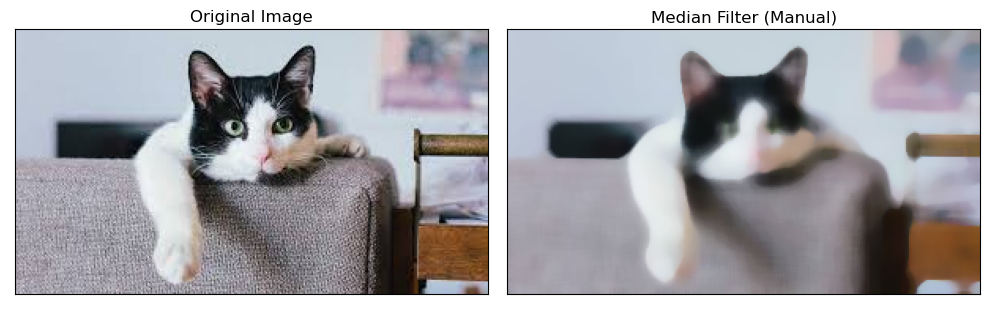

In [22]:
#removing noise
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = 'cat.jpg'
image = cv2.imread(image_path)

# Convert BGR image to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to apply median filter manually
def median_filter(image, filter_size):
    # Get image dimensions
    height, width, channels = image.shape
    
    # Initialize output image
    filtered_image = np.zeros_like(image)
    
    # Pad image
    pad_size = filter_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), 'edge')
    
    # Apply median filter
    for i in range(height):
        for j in range(width):
            for k in range(channels):
                # Extract neighborhood
                neighborhood = padded_image[i:i+filter_size, j:j+filter_size, k]
                
                # Calculate median value
                median_value = np.median(neighborhood)
                
                # Assign median value to filtered image
                filtered_image[i, j, k] = median_value
    
    return filtered_image

# Apply median filter manually
filtered_image_manual = median_filter(image, 11)

# Convert filtered image to RGB
filtered_rgb = cv2.cvtColor(filtered_image_manual, cv2.COLOR_BGR2RGB)

# Plot the original and filtered images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the filtered image
axs[1].imshow(filtered_rgb)
axs[1].set_title('Median Filter (Manual)')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


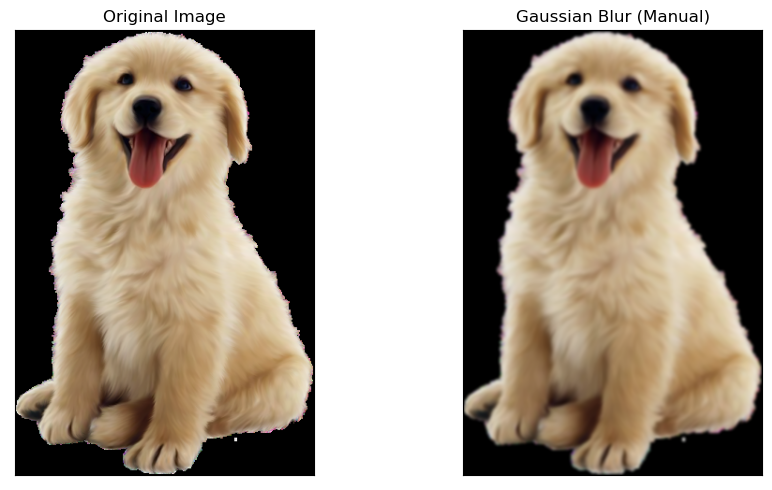

In [20]:
#gussian blur
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = 'puppy.jpg'
image = cv2.imread(image_path)

# Convert BGR image to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to apply Gaussian blur manually
def gaussian_blur(image, kernel_size):
    # Define Gaussian kernel
    kernel = np.outer(cv2.getGaussianKernel(kernel_size, 0), cv2.getGaussianKernel(kernel_size, 0))
    
    # Get image dimensions
    height, width, channels = image.shape
    
    # Initialize output image
    blurred_image = np.zeros_like(image)
    
    # Pad image
    pad_size = kernel_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), 'edge')
    
    # Apply Gaussian blur
    for i in range(height):
        for j in range(width):
            for k in range(channels):
                # Extract neighborhood
                neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size, k]
                
                # Apply Gaussian kernel
                blurred_value = np.sum(neighborhood * kernel)
                
                # Assign blurred value to output image
                blurred_image[i, j, k] = blurred_value
    
    return blurred_image

# Apply Gaussian blur manually
filtered_image_manual = gaussian_blur(image, 7)

# Convert filtered image to RGB
filtered_rgb = cv2.cvtColor(filtered_image_manual, cv2.COLOR_BGR2RGB)

# Plot the original and filtered images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the filtered image
axs[1].imshow(filtered_rgb)
axs[1].set_title('Gaussian Blur (Manual)')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


C:\Users\CCL\AppData\Local\Temp\ipykernel_18420\3044468298.py:35: RuntimeWarning: invalid value encountered in true_divide
  h[mask] = 60 * (g[mask] - b[mask]) / (v[mask] - np.minimum(np.minimum(r[mask], g[mask]), b[mask])) % 360
C:\Users\CCL\AppData\Local\Temp\ipykernel_18420\3044468298.py:35: RuntimeWarning: invalid value encountered in remainder
  h[mask] = 60 * (g[mask] - b[mask]) / (v[mask] - np.minimum(np.minimum(r[mask], g[mask]), b[mask])) % 360
C:\Users\CCL\AppData\Local\Temp\ipykernel_18420\3044468298.py:37: RuntimeWarning: invalid value encountered in true_divide
  h[mask] = 120 + 60 * (b[mask] - r[mask]) / (v[mask] - np.minimum(np.minimum(r[mask], g[mask]), b[mask]))
C:\Users\CCL\AppData\Local\Temp\ipykernel_18420\3044468298.py:39: RuntimeWarning: invalid value encountered in true_divide
  h[mask] = 240 + 60 * (r[mask] - g[mask]) / (v[mask] - np.minimum(np.minimum(r[mask], g[mask]), b[mask]))
C:\Users\CCL\AppData\Local\Temp\ipykernel_18420\3044468298.py:67: RuntimeWarning: 

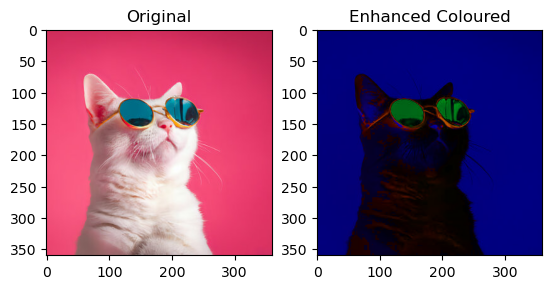

In [25]:
#enhancing color in image
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('cat1.jpg')

# Convert BGR image to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image_rgb)

# Convert the image from BGR to HSV color space manually
def rgb_to_hsv(rgb_image):
    # Extract individual channels
    r, g, b = rgb_image[:,:,0], rgb_image[:,:,1], rgb_image[:,:,2]
    
    # Normalize to range [0, 1]
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    
    # Calculate value channel
    v = np.maximum(np.maximum(r, g), b)
    
    # Calculate saturation channel
    s = v.copy()
    s[s != 0] = (v[s != 0] - np.minimum(np.minimum(r[s != 0], g[s != 0]), b[s != 0])) / v[s != 0]
    
    # Calculate hue channel
    h = np.zeros_like(v)
    mask = (v == r)
    h[mask] = 60 * (g[mask] - b[mask]) / (v[mask] - np.minimum(np.minimum(r[mask], g[mask]), b[mask])) % 360
    mask = (v == g)
    h[mask] = 120 + 60 * (b[mask] - r[mask]) / (v[mask] - np.minimum(np.minimum(r[mask], g[mask]), b[mask])) 
    mask = (v == b)
    h[mask] = 240 + 60 * (r[mask] - g[mask]) / (v[mask] - np.minimum(np.minimum(r[mask], g[mask]), b[mask])) 

    # Convert hue to range [0, 1]
    h = h / 360.0
    
    # Stack channels and return HSV image
    hsv_image = np.dstack((h, s, v))
    
    return hsv_image

# Convert to HSV manually
image_hsv = rgb_to_hsv(image_rgb)

# Adjust the hue, saturation, and value of the image manually
image_hsv[:,:,0] = image_hsv[:,:,0] * 0.7
image_hsv[:,:,1] = image_hsv[:,:,1] * 1.5
image_hsv[:,:,2] = image_hsv[:,:,2] * 0.5

# Convert HSV back to RGB manually
def hsv_to_rgb(hsv_image):
    # Extract individual channels
    h, s, v = hsv_image[:,:,0], hsv_image[:,:,1], hsv_image[:,:,2]
    
    # Initialize RGB channels
    r, g, b = np.zeros_like(h), np.zeros_like(s), np.zeros_like(v)
    
    # Convert HSV to RGB
    c = v * s
    x = c * (1 - np.abs((h * 6) % 2 - 1))
    m = v - c
    
    mask = (h >= 0) & (h < 1/6)
    r[mask], g[mask], b[mask] = c[mask], x[mask], 0
    mask = (h >= 1/6) & (h < 2/6)
    r[mask], g[mask], b[mask] = x[mask], c[mask], 0
    mask = (h >= 2/6) & (h < 3/6)
    r[mask], g[mask], b[mask] = 0, c[mask], x[mask]
    mask = (h >= 3/6) & (h < 4/6)
    r[mask], g[mask], b[mask] = 0, x[mask], c[mask]
    mask = (h >= 4/6) & (h < 5/6)
    r[mask], g[mask], b[mask] = x[mask], 0, c[mask]
    mask = (h >= 5/6) & (h <= 1)
    r[mask], g[mask], b[mask] = c[mask], 0, x[mask]
    
    # Convert to uint8 and stack channels
    rgb_image = np.dstack((r, g, b)) * 255
    rgb_image = np.clip(rgb_image + m[:, :, np.newaxis], 0, 255).astype(np.uint8)
    
    return rgb_image

# Convert to RGB manually
image2_rgb = hsv_to_rgb(image_hsv)

# Plot the enhanced image
plt.subplot(1, 2, 2)
plt.title("Enhanced Coloured")
plt.imshow(image2_rgb)
plt.show()


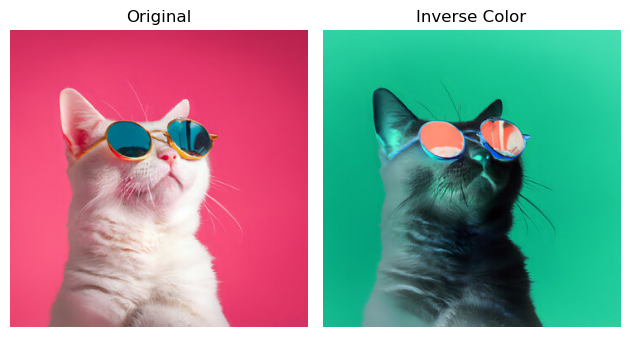

In [34]:
#inverse transform
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = 'cat1.jpg'
image = cv2.imread(image_path)

# Convert BGR image to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image_rgb)

# Manually invert the colors
inverse_image = np.zeros_like(image)

# Iterate through each pixel and invert the colors
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        for k in range(image.shape[2]):
            inverse_image[i, j, k] = 255 - image[i, j, k]

# Convert the inverted image from BGR to RGB for display
inverse_image_rgb = cv2.cvtColor(inverse_image, cv2.COLOR_BGR2RGB)

# Plot the inverted image
plt.subplot(1, 2, 2)
plt.title("Inverse Color")
plt.imshow(inverse_image_rgb)

# Remove ticks from the subplots
for ax in plt.gcf().axes:
    ax.axis('off')

# Display the subplots
plt.tight_layout()
plt.show()


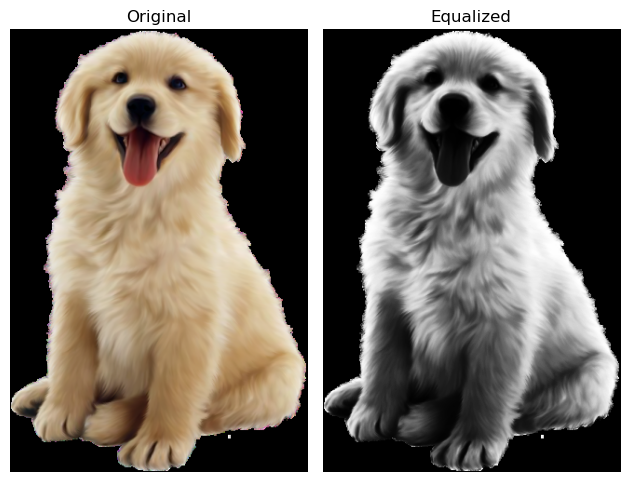

In [40]:
#Equalizing histograms 
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = 'puppy.jpg'
image = cv2.imread(image_path)

# Convert BGR image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Manually perform histogram equalization
def histogram_equalization(image):
    # Compute histogram
    histogram = np.zeros(256)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            histogram[image[i, j]] += 1
    
    # Compute cumulative distribution function (CDF)
    cdf = np.zeros(256)
    cdf[0] = histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + histogram[i]
    
    # Normalize CDF
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    
    # Apply equalization
    equalized_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            equalized_image[i, j] = cdf_normalized[image[i, j]]
    
    return equalized_image.astype(np.uint8)

# Apply histogram equalization manually
equalized_image = histogram_equalization(gray_image)

# Plot the equalized image
plt.subplot(1, 2, 2)
plt.title("Equalized")
plt.imshow(equalized_image, cmap='gray')

# Remove ticks from the subplots
for ax in plt.gcf().axes:
    ax.axis('off')

# Display the subplots
plt.tight_layout()
plt.show()
